In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor, plot_importance

import shap

/Users/dickinson.arismendy/Workspace/personal/maestria-ia/indexador-py/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:

# 📄 Leer datos
df = pd.read_csv("../data/aptos_bogota_enriched.csv")
df = df.drop("estrato", axis=1).rename(columns={"estrato_calculado": "estrato"})

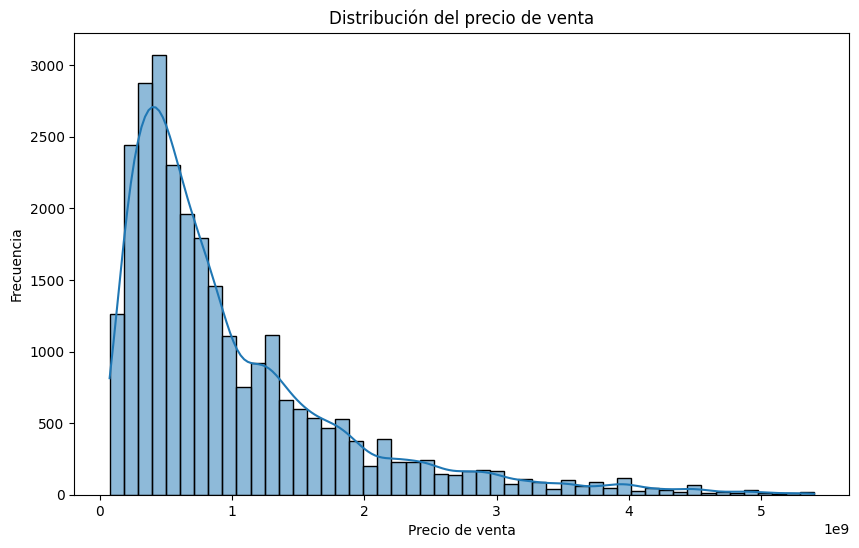

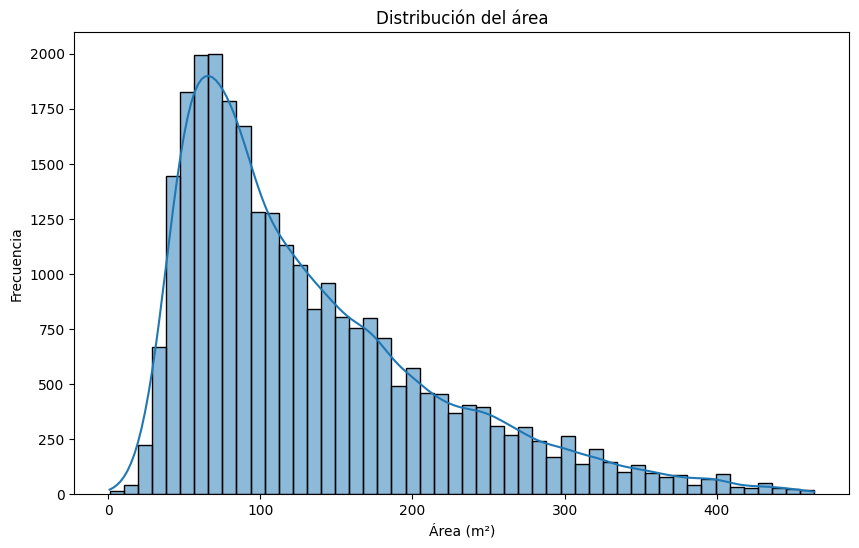

In [5]:
# ------ DISTRIBUCIONES BÁSICAS ------
plt.figure(figsize=(10,6))
sns.histplot(df['precio_venta'], bins=50, kde=True)
plt.title("Distribución del precio de venta")
plt.xlabel("Precio de venta")
plt.ylabel("Frecuencia")
plt.show()

plt.figure(figsize=(10,6))
sns.histplot(df['area'], bins=50, kde=True)
plt.title("Distribución del área")
plt.xlabel("Área (m²)")
plt.ylabel("Frecuencia")
plt.show()


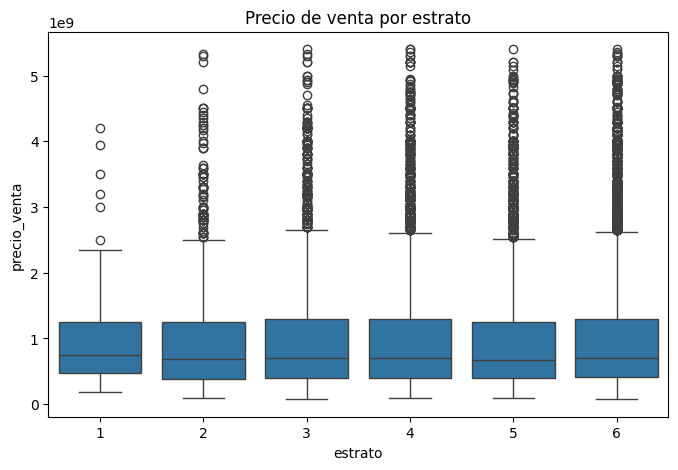

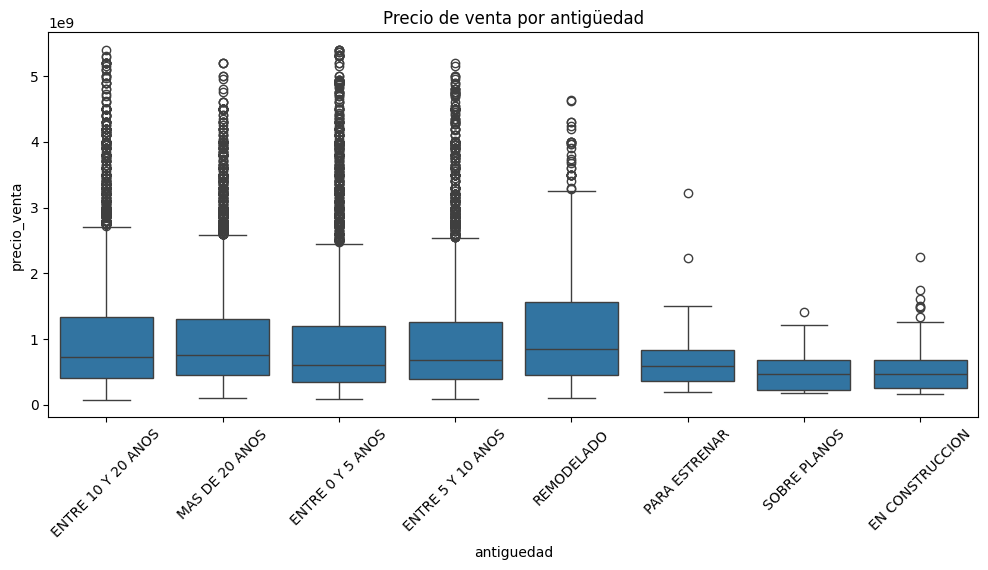

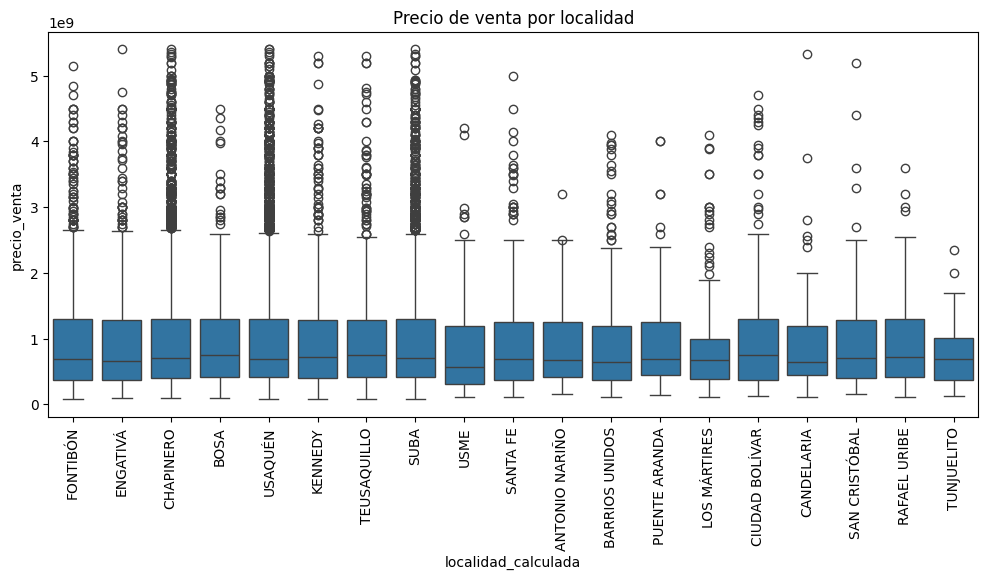

In [6]:
# ------ BOX PLOTS por CATEGORÍAS ------
plt.figure(figsize=(8,5))
sns.boxplot(x='estrato', y='precio_venta', data=df)
plt.title("Precio de venta por estrato")
plt.show()

plt.figure(figsize=(12,5))
sns.boxplot(x='antiguedad', y='precio_venta', data=df)
plt.title("Precio de venta por antigüedad")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12,5))
sns.boxplot(x='localidad_calculada', y='precio_venta', data=df)
plt.title("Precio de venta por localidad")
plt.xticks(rotation=90)
plt.show()



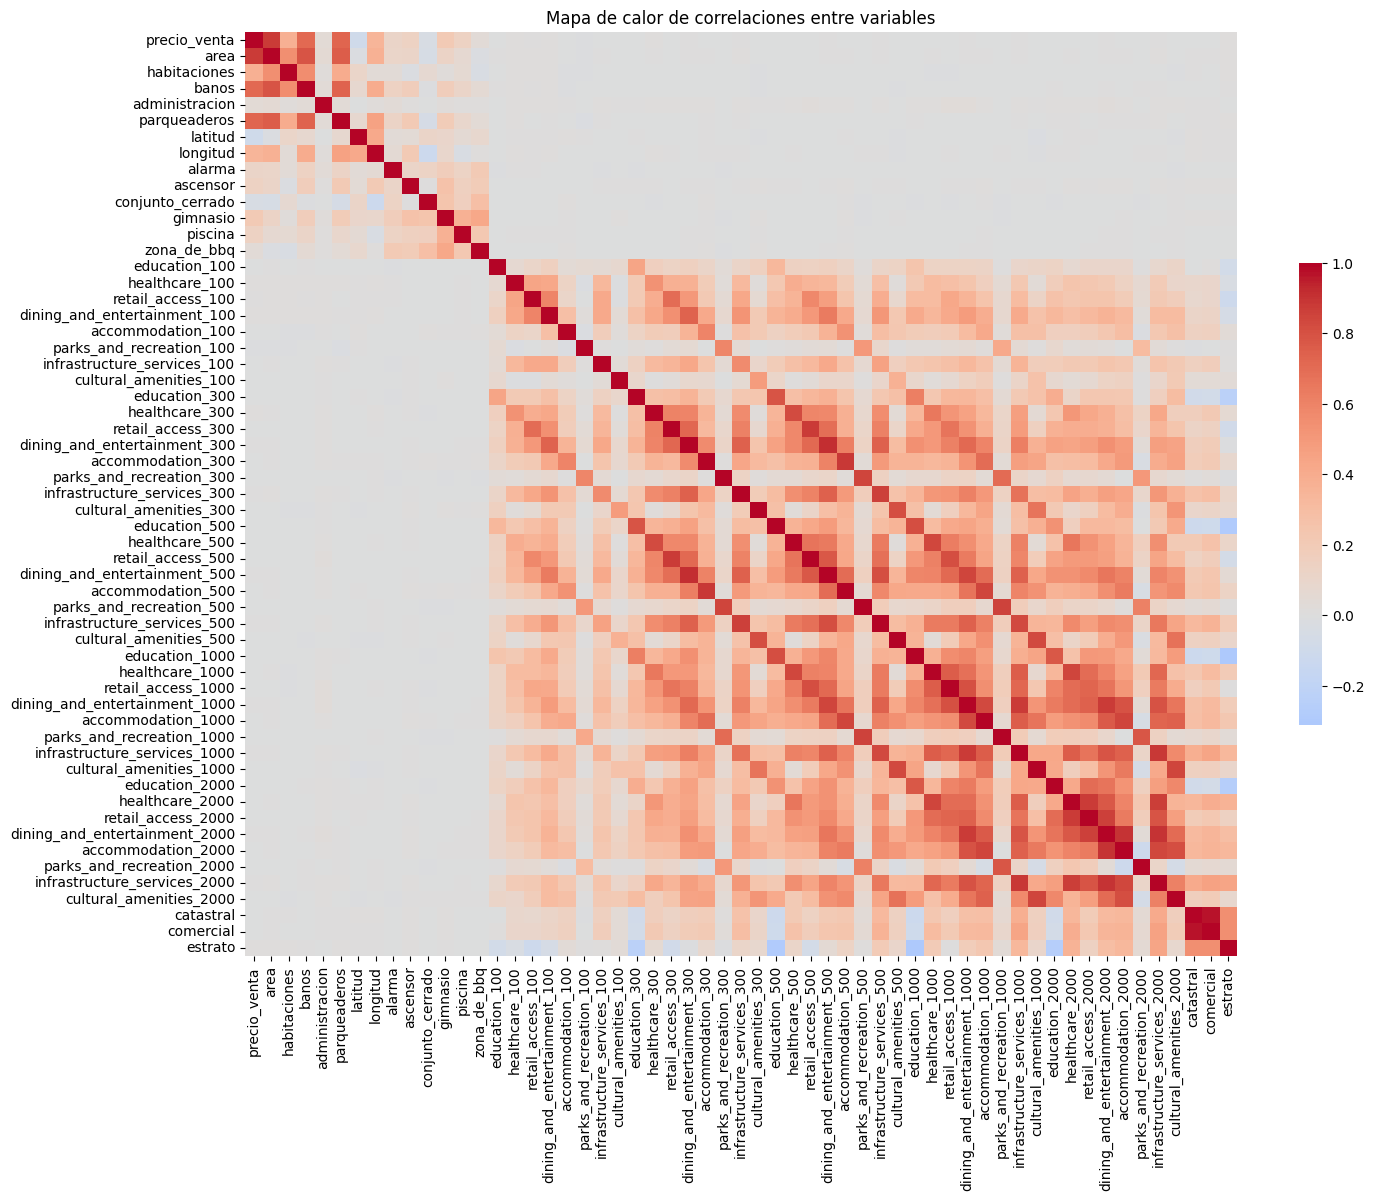

In [7]:
# ------ MAPA DE CALOR DE CORRELACIONES ------
corr = df.corr(numeric_only=True)  # incluye todas las numéricas
plt.figure(figsize=(16,12))
sns.heatmap(corr, cmap='coolwarm', annot=False, fmt='.2f', center=0, cbar_kws={'shrink':.5})
plt.title("Mapa de calor de correlaciones entre variables")
plt.show()



Correlación de variables contextuales con precio_venta:
precio_venta                     1.000000
healthcare_100                   0.012556
dining_and_entertainment_100     0.012278
healthcare_300                   0.007122
infrastructure_services_300      0.005719
infrastructure_services_2000     0.005482
retail_access_100                0.005124
infrastructure_services_1000     0.004989
dining_and_entertainment_500     0.003696
dining_and_entertainment_1000    0.003180
infrastructure_services_500      0.002847
dining_and_entertainment_300     0.002593
dining_and_entertainment_2000    0.001860
accommodation_2000               0.001697
healthcare_2000                  0.001677
healthcare_500                   0.001603
education_1000                   0.001257
education_100                    0.001252
accommodation_300                0.000949
healthcare_1000                  0.000787
cultural_amenities_500           0.000057
education_2000                  -0.000015
accommodation_500  

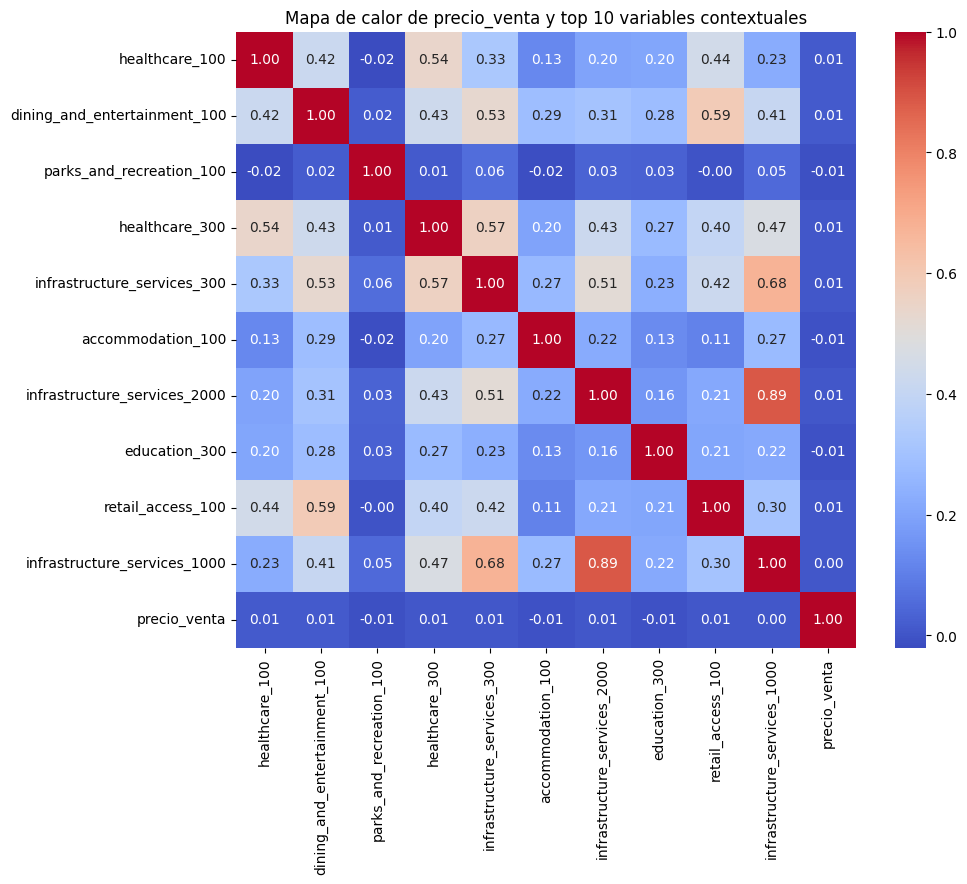

In [8]:

# ------ VARIABLES CONTEXTUALES ------
context_cols = [col for col in df.columns if any(key in col for key in ["education", "healthcare", "parks", "retail", "dining", "accommodation", "infrastructure", "cultural"])]

# Correlaciones con precio_venta para las contextuales
context_corr = df[context_cols + ['precio_venta']].corr()['precio_venta'].sort_values(ascending=False)
print("\nCorrelación de variables contextuales con precio_venta:")
print(context_corr)

# Gráfico separado para las más relevantes
top_context = context_corr.drop("precio_venta").abs().sort_values(ascending=False).head(10).index
plt.figure(figsize=(10,8))
sns.heatmap(df[top_context.tolist() + ['precio_venta']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Mapa de calor de precio_venta y top 10 variables contextuales")
plt.show()

In [5]:
df['antiguedad'].unique()

array(['ENTRE 10 Y 20 ANOS', 'MAS DE 20 ANOS', 'ENTRE 0 Y 5 ANOS',
       'ENTRE 5 Y 10 ANOS', 'REMODELADO', 'PARA ESTRENAR', 'SOBRE PLANOS',
       'EN CONSTRUCCION', nan], dtype=object)